# Sky Model

In [1]:
demFile = r"Crater_Lake.tif"
#skyConfig = r"..\SkyConfigFiles\Clear_400_NNW_45.txt"
skyConfig = r"..\SkyConfigFiles\TESTING_12_NW_45.txt"
ve = 5
cellSize = 3.33

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '..')
from trf import utils, surface, shader, shadow

from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display

cm=1/2.54

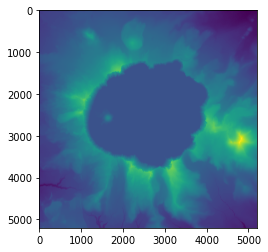

In [3]:
d = np.asarray(Image.open(demFile))
plt.imshow(d)

In [4]:
lights = utils.lightList(skyConfig)
snv = surface.normals(d, cellSize)
d = d * ve

In [5]:
progressMsg = HTML()
progressBar = IntProgress(min=0, max=len(lights))
vbox=VBox(children=[progressBar, progressMsg])
display(vbox)

accumulator = np.zeros(d.shape)
for (i, (azimuth, elev, wt)) in enumerate(lights):
    progressBar.value = i+1
    progressMsg.value = f"Light {progressBar.value} of {progressBar.max} : Az={azimuth} / El={elev} / Wt={wt}"
    shadowArray = shadow.shadowLine(d, float(azimuth), float(elev), cellSize)
    shadeArray = shader.lambert(snv, utils.lightVector(float(azimuth), float(elev)))
    shadeArray[shadeArray<0] = 0
    shadeArray[shadowArray>0] = 0
    accumulator = accumulator + (float(wt) * shadeArray)
progressBar.bar_style='success'

In [6]:
# stretch across min..max
hs = (accumulator - accumulator.min()) * (255 / (accumulator.max()-accumulator.min()))

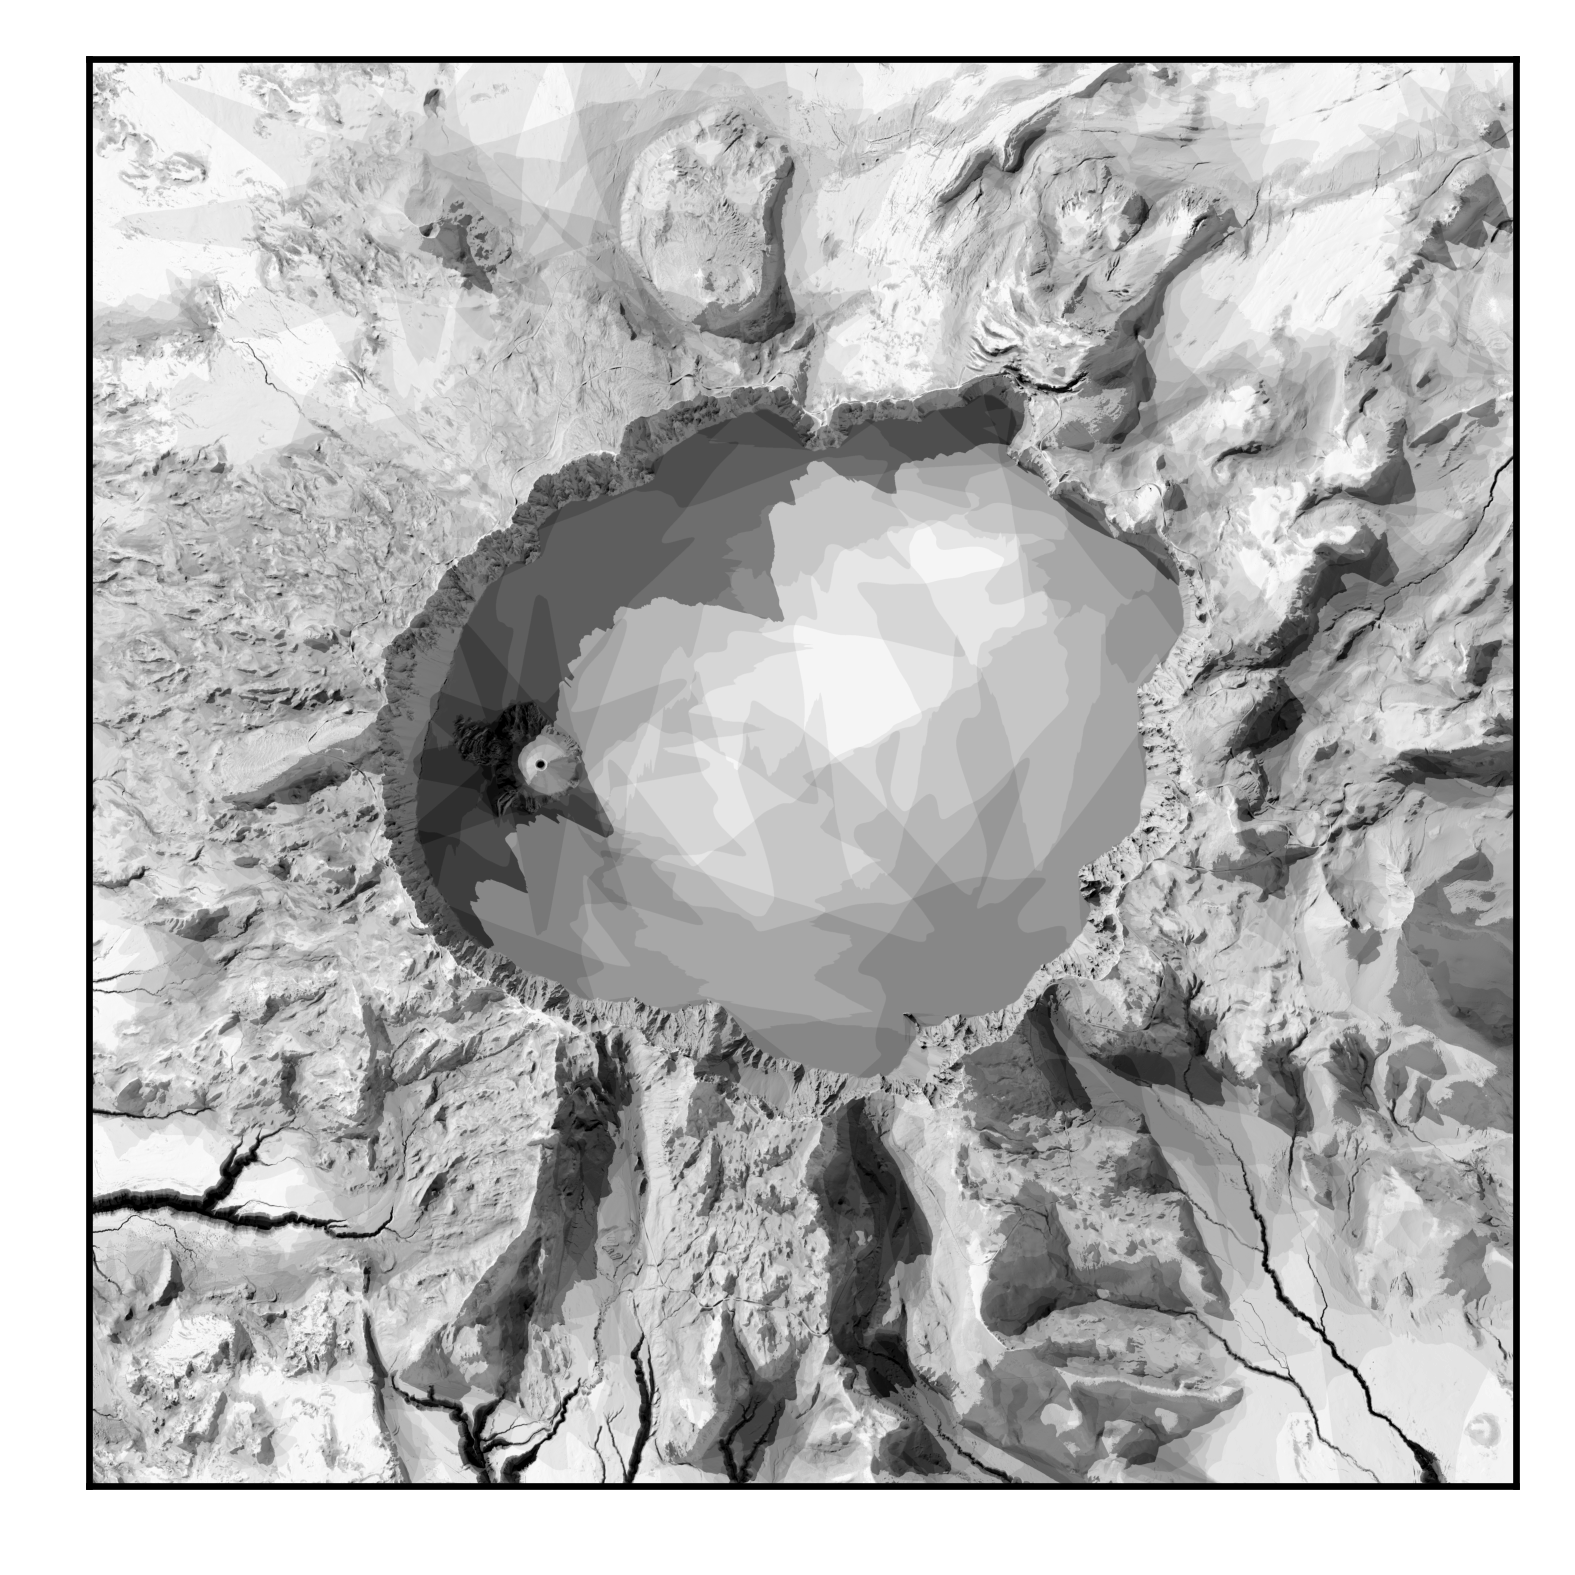

In [7]:
fig, axs = plt.subplots(1,1, figsize=(8*cm, 8*cm))
fig.set_dpi(600)
axs.yaxis.set_visible(False)
axs.xaxis.set_visible(False)
axs.imshow(accumulator, cmap='gray')
#axs.imshow(hs.astype('uint8'), cmap='gray', vmin=0, vmax=255)